### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Performing EDA

In [2]:
df = pd.read_csv('data.csv') #reading data

In [3]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


#### Checking for null values

In [4]:
df.isnull()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().values.any()

False

#### Finding the unique values in our dependent variable

In [6]:
df.y.unique()

array([4, 1, 5, 2, 3], dtype=int64)

- All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure

- So our aim here will to keep the output value of y=1 as it is and convert all remaining values i.e 2,3,4,5 to 0 

#### Finding the Correaltion

In [10]:
df.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
X1,1.000000,0.947729,0.808192,0.608109,0.393674,0.218226,0.103693,0.044483,0.027923,0.032221,...,0.027263,0.045401,0.051630,0.049604,0.042967,0.036144,0.030581,0.024562,0.020022,0.022375
X2,0.947729,1.000000,0.944623,0.790403,0.576579,0.369803,0.211793,0.109478,0.060218,0.043565,...,0.012602,0.025937,0.031606,0.030452,0.025975,0.024290,0.023906,0.021962,0.018059,0.019154
X3,0.808192,0.944623,1.000000,0.939522,0.778648,0.573874,0.382493,0.231084,0.133249,0.080003,...,0.004575,0.011752,0.016424,0.017070,0.014837,0.015536,0.016982,0.017070,0.012419,0.013469
X4,0.608109,0.790403,0.939522,1.000000,0.938636,0.784954,0.590497,0.399855,0.250052,0.150284,...,-0.001028,0.000632,0.006617,0.011882,0.014496,0.016992,0.016911,0.014671,0.006226,0.004763
X5,0.393674,0.576579,0.778648,0.938636,1.000000,0.941267,0.792304,0.596424,0.410651,0.265112,...,0.004861,0.000918,0.006488,0.013946,0.019146,0.021924,0.018869,0.013607,0.001298,-0.006597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X175,0.036144,0.024290,0.015536,0.016992,0.021924,0.022444,0.014869,-0.000510,-0.018552,-0.036517,...,0.195640,0.366428,0.573335,0.782018,0.936986,1.000000,0.933893,0.759069,0.533265,0.028425
X176,0.030581,0.023906,0.016982,0.016911,0.018869,0.020977,0.017016,0.005851,-0.009052,-0.025522,...,0.084966,0.195891,0.359400,0.563321,0.767300,0.933893,1.000000,0.931826,0.759381,0.027259
X177,0.024562,0.021962,0.017070,0.014671,0.013607,0.017383,0.018572,0.012590,0.001943,-0.011809,...,0.022042,0.071946,0.175322,0.337020,0.537493,0.759069,0.931826,1.000000,0.934330,0.026156
X178,0.020022,0.018059,0.012419,0.006226,0.001298,0.004240,0.008325,0.008032,0.004823,-0.001332,...,-0.004094,0.001945,0.049854,0.155044,0.315385,0.533265,0.759381,0.934330,1.000000,0.025168


['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15']


<AxesSubplot:>

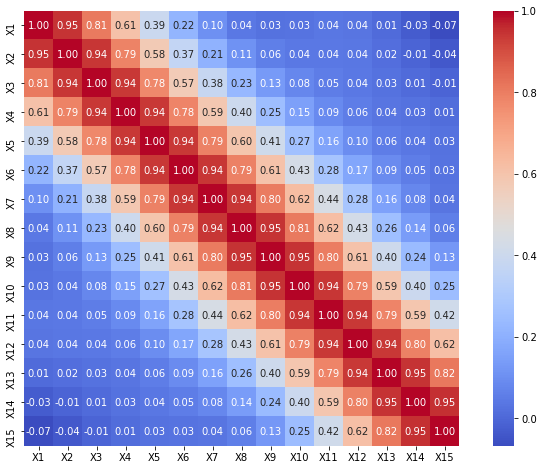

In [11]:
# Considering the first 15 feature cloumn
sel_features= list(df.columns[1:16])
print(sel_features)
corr = df[sel_features].corr() 
plt.figure(figsize=(12,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',
           xticklabels= sel_features, yticklabels= sel_features,
           cmap= 'coolwarm')

# Classification of Epileptical Seizures from EEG signals using Deep Learning

In [12]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential #appropriate for a plain stack of layers
from keras.utils import np_utils # provides functions to perform actions on numpy arrays
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd

import matplotlib.pyplot as plt

### Data Preprocessing

In [85]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [13]:
X=df.values #return the numpy representation of the given DataFrame

In [14]:
X=X[:,1:-1]

In [15]:
from sklearn.model_selection import train_test_split


y=np.array(df['y'])
Y=np_utils.to_categorical(y) # transform your training data into vectors before you pass it to your model

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


In [16]:
X_train = X_train.reshape(-1,178,1)
X_test = X_test.reshape(-1,178,1)
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)

X_train.shape
X_test.shape

(2300, 178, 1)

### Intuition of the Epileptical Signal In the Dataset

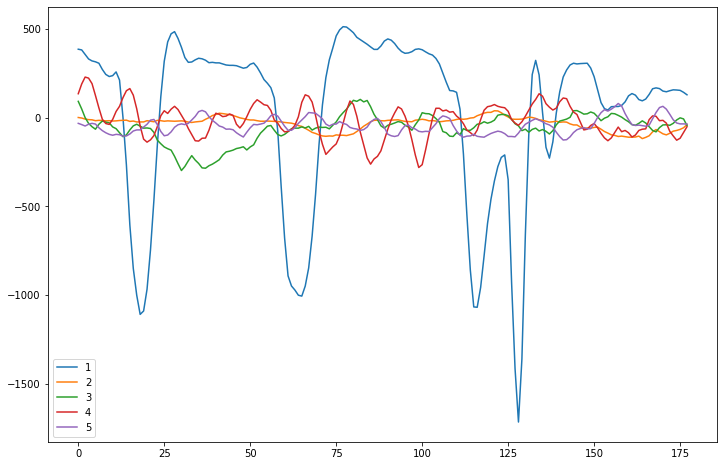

In [17]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

### Creating LSTM Neural Network For the Classification

In [18]:
model = Sequential() # a way of creating deep learning models where an instance of the Sequential class 
                     # is created and model layers are created and added to it
model.add(LSTM(56, input_shape=(45,1), return_sequences=True)) #1 lstm layer is created with 56 neurons
                    # input_shape of 45 time step and 1 feature
                    # return sequence is set to True, the output of the hidden state of each neuron is used as an input to the next LSTM layer
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))# Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting
model.add(Dense(20)) #it adds and hidden layer
model.add(Activation('tanh')) # Hyperbolic tangent activation function.
model.add(Dense(5))
model.add(Activation('softmax')) #Softmax converts a vector of values to a probability distribution.
                                #The elements of the output vector are in range (0, 1) and sum to 1

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 45, 56)            12992     
_________________________________________________________________
dropout (Dropout)            (None, 45, 56)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 56)                25312     
_________________________________________________________________
dropout_1 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                1140      
_________________________________________________________________
activation (Activation)      (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#loss function, this is the objective that the model will try to minimize
#metrics, classification problem you will want to set this to metrics=['accuracy']

In [20]:
hist = model.fit(((X_train[:,::4]-X_train.mean())/X_train.std()),Y_train[:,1:],validation_data=((X_test[:,::4]-X_test.mean())/X_test.std(),Y_test[:,1:])
                ,epochs = 50, batch_size=15,shuffle=False
                )`
#The batch size is a number of samples processed before the model is updated.
#The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

Epoch 1/50
614/614 [==============================] - 43s 58ms/step - loss: 0.4140 - accuracy: 0.3989 - val_loss: 0.3868 - val_accuracy: 0.4274
Epoch 2/50
614/614 [==============================] - 34s 56ms/step - loss: 0.3771 - accuracy: 0.4558 - val_loss: 0.3711 - val_accuracy: 0.4691
Epoch 3/50
614/614 [==============================] - 34s 56ms/step - loss: 0.3481 - accuracy: 0.5271 - val_loss: 0.3119 - val_accuracy: 0.6213
Epoch 4/50
614/614 [==============================] - 34s 56ms/step - loss: 0.2956 - accuracy: 0.6074 - val_loss: 0.2713 - val_accuracy: 0.6465
Epoch 5/50
614/614 [==============================] - 34s 56ms/step - loss: 0.2693 - accuracy: 0.6375 - val_loss: 0.2532 - val_accuracy: 0.6691
Epoch 6/50
614/614 [==============================] - 34s 56ms/step - loss: 0.2542 - accuracy: 0.6674 - val_loss: 0.2448 - val_accuracy: 0.6791
Epoch 7/50
614/614 [==============================] - 33s 54ms/step - loss: 0.2461 - accuracy: 0.6736 - val_loss: 0.2419 - val_accuracy:

### Saving the trained model

In [95]:
model.save('Epilepsy.h5')

### Visualization

- Graph Between Training Loss and Training Accuracy

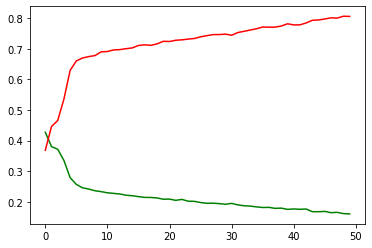

In [97]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['accuracy'],'r')
plt.show()

- Graph Between Validation Loss Function and Validation Accuracy

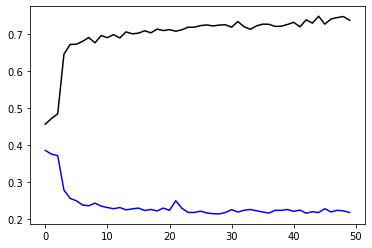

In [99]:
plt.figure(0)
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()